# Newton fractal
[Newton fractal](https://en.wikipedia.org/wiki/Newton_fractal) maps the convergence of [Newton's root finding method](https://en.wikipedia.org/wiki/Newton%27s_method) applied to a complex polynomial. The iteration is:

$$ z_{{n+1}}:=z_{n}-{\frac  {p(z_{n})}{p'(z_{n})}} $$

and for one of the simplest interesting polynomial is:

$$ z^3 -1 = 0, $$

for which the iteration is:

$$ z_{n+1} = z_n - {z_n^3-1 \over 3 z^2_n } $$

This demonstrate the non-trivial nature of this seemingly simple algorithm and also related to chaotil maps and pseudo-random number generators.

In [1]:
import numpy as np
from numba import jit
import matplotlib.pyplot as plt
%matplotlib inline
from colorsys import hls_to_rgb

In [2]:
maxIt = 20 # max iterations allowed
h = 1e-6 # step size for numerical derivative
eps = 1e-3 # max error allowed

# put any complex function here to generate a fractal for it!
def f(z):
    return z * z * z - 1.0

x, y = np.ogrid[-1.5:1.5:501j, -1.5:1.5:501j]
z = x + 1j*y
img = np.zeros(z.shape)

for i in range(maxIt):
    # complex numerical derivative
    dz = (f(z + complex(h, h)) - f(z)) / complex(h, h)
    z0 = z - f(z) / dz # Newton iteration
    
    # binary mask converged=1, not converged = 0
    converged = ( np.abs(z0 - z) < eps ).astype(int)
    
    # set newly converged pixels to the iteration step value
    img[img==0] = i * converged[img==0]  

    z = z0



/home/csabai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
/home/csabai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in multiply
  import sys
/home/csabai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in less


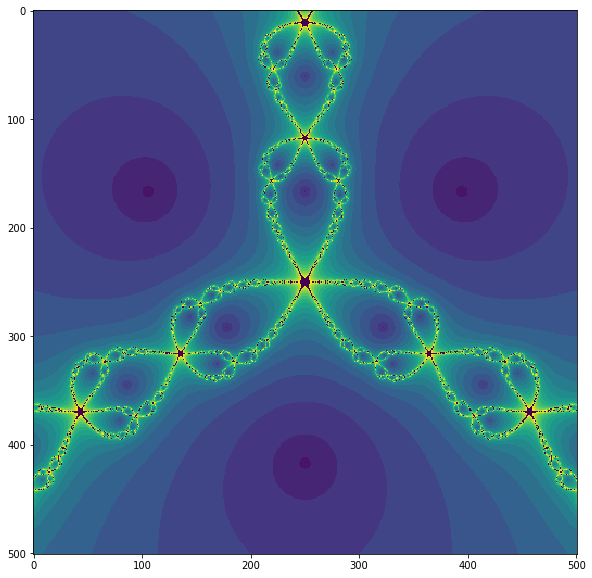

In [3]:
plt.figure(figsize=[10,10])
plt.imshow(img)